In [1]:
library(dplyr)
library(ggplot2)
library(repr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
data <- read.csv("../../terrorism.csv")
group_names <- read.csv("final_names.csv")

In [3]:
# Size of the plots
options(repr.plot.width=10, repr.plot.height=5)

#### We're interested in the data that has information regarding the individuals:

In [4]:
data <- data[data$gname != "Unknown" & data$gname != "Other" & data$gname != "Unaffiliated Individual(s)",]
data <- data[data$gname %in% group_names$x,]

# 1. Who are they? Where are they from? Do they act in groups? Are they working alone?

## 1.1. Top 15 most active groups

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

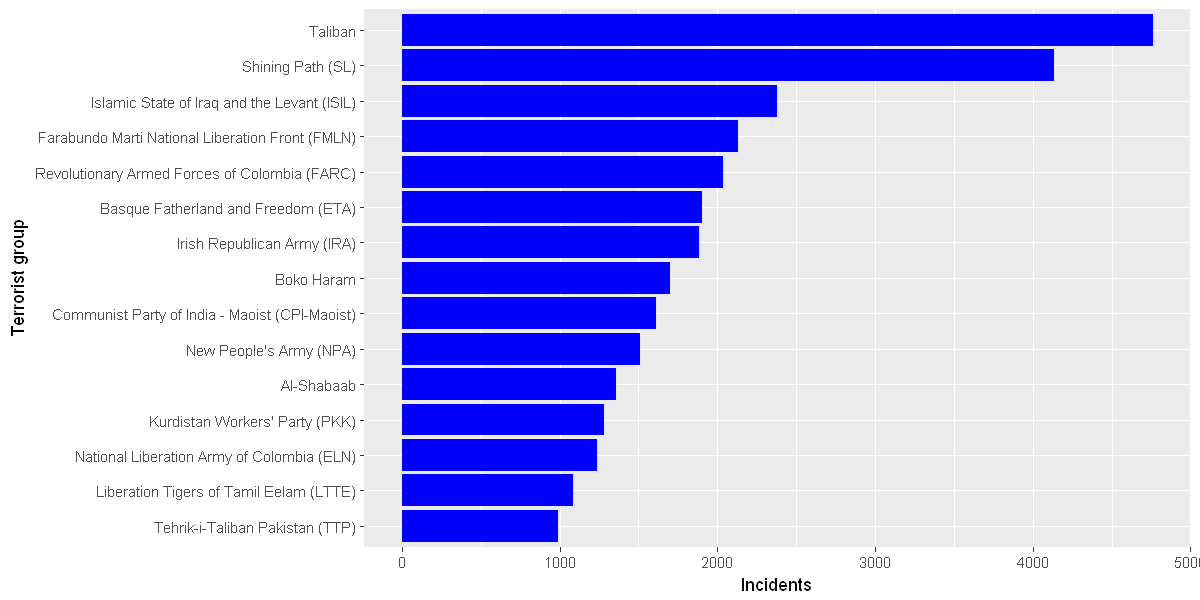

In [5]:
data1 <- data %>% group_by(gname) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

ggplot(data1, aes(x = reorder(gname, number_incidents), y = number_incidents)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Terrorist group") +
  ylab("Incidents")

- 

## 1.2. Regions in which the terrorists attack

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

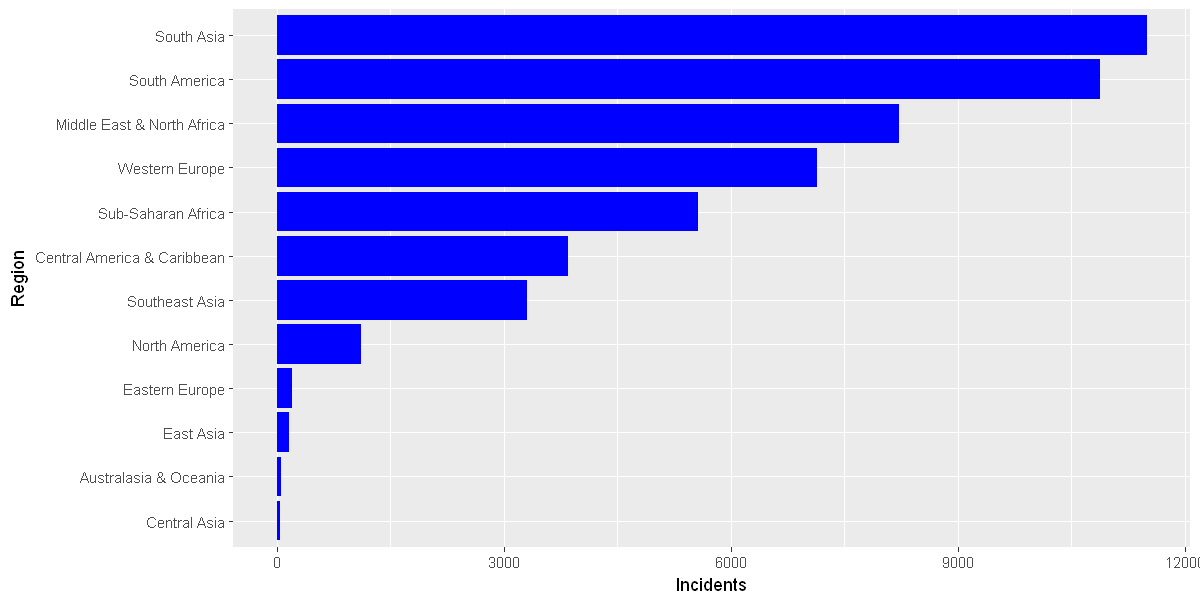

In [6]:
data1 <- data %>% group_by(region_txt) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

ggplot(data1, aes(x = reorder(region_txt, number_incidents), y = number_incidents)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Region") +
  ylab("Incidents")

## 1.3. Countries in which the terrorists attack

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

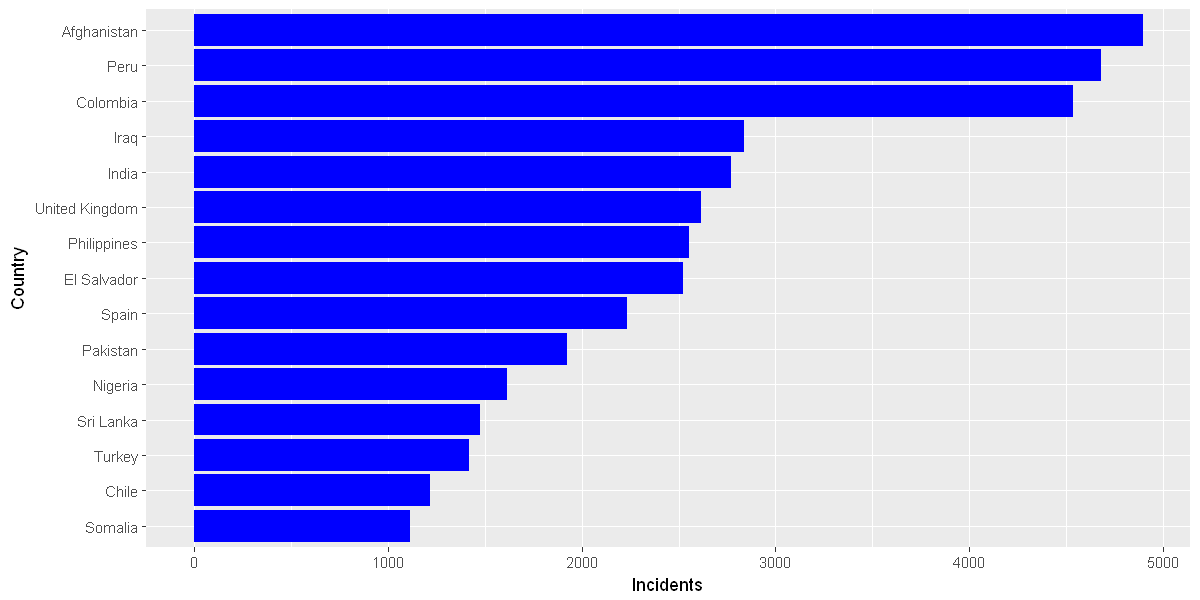

In [7]:
data1 <- data %>% group_by(country_txt) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

ggplot(data1, aes(x = reorder(country_txt, number_incidents), y = number_incidents)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Country") +
  ylab("Incidents")

## 1.4. Median number of perps in regions

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

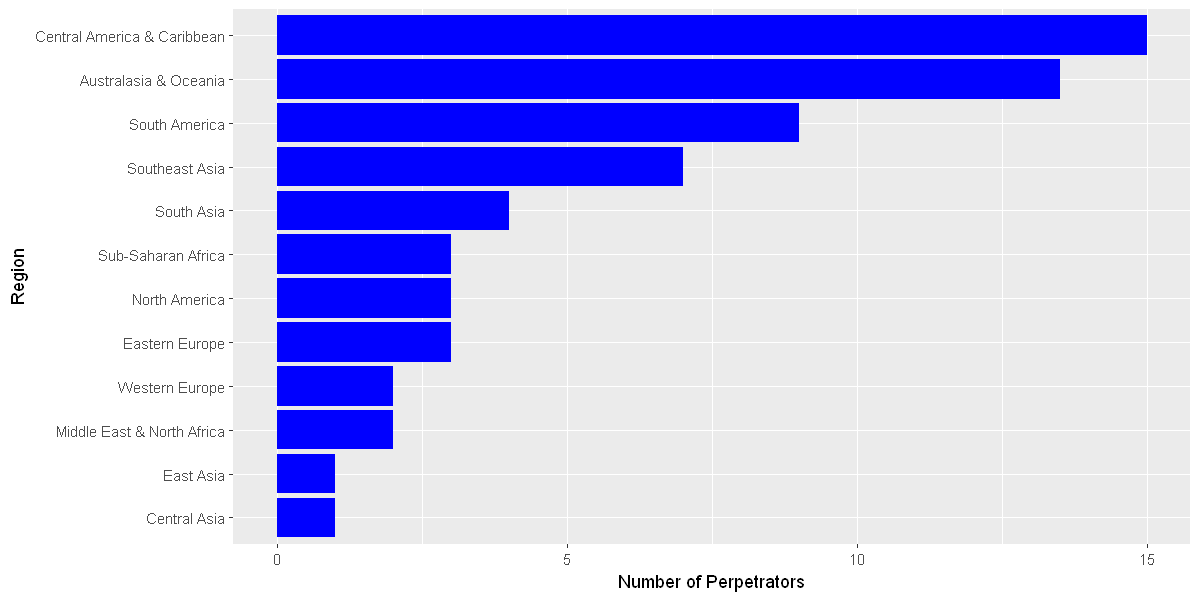

In [8]:
data1 <- data %>% filter(nperps != "Unknown" & nperps != "-99") %>% group_by(region_txt) %>%
  summarise(n_perps = median(nperps, na.rm = TRUE)) %>% 
  arrange(desc(n_perps)) %>% head(15)

ggplot(data1, aes(x = reorder(region_txt, n_perps), y = n_perps)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Region") +
  ylab("Number of Perpetrators")

## 1.5. Median number of perps in countries

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

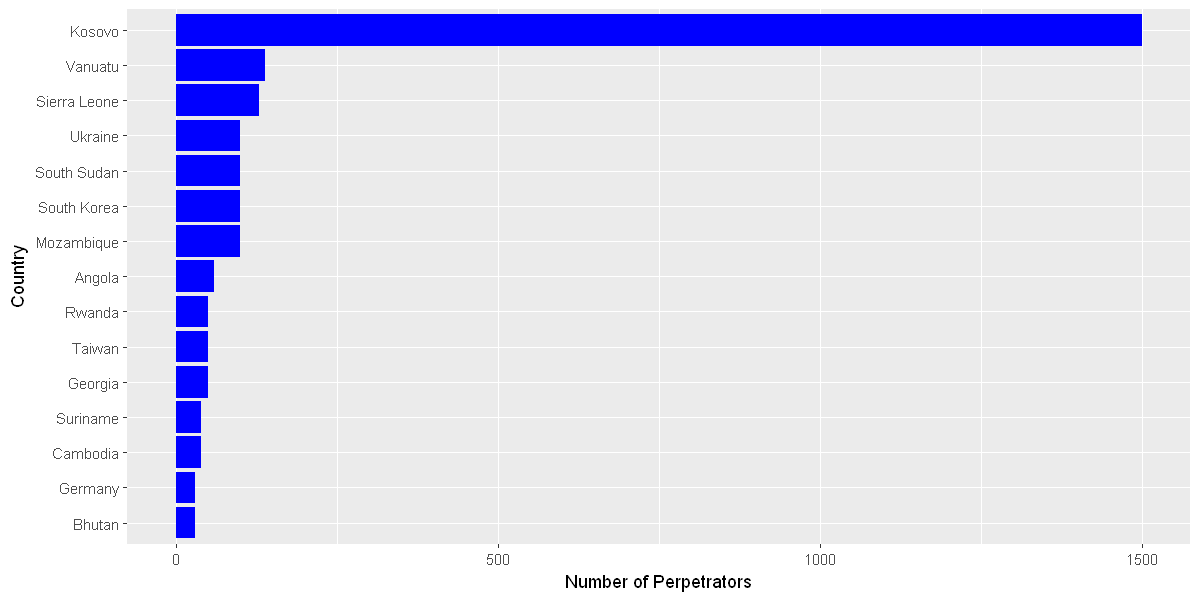

In [9]:
data1 <- data %>% filter(nperps != "Unknown" & nperps != "-99") %>% group_by(country_txt) %>%
  summarise(n_perps = median(nperps, na.rm = TRUE)) %>% 
  arrange(desc(n_perps)) %>% head(15)

ggplot(data1, aes(x = reorder(country_txt, n_perps), y = n_perps)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Country") +
  ylab("Number of Perpetrators")

# 2. Which motivations do they have? --- (does the motivation depends on the terrorist group?)

Create a new categorical feature called "motivation", based on the motive's text field?

# 3. How is the motive changing?

# 4. Which kind of attack do they use? --- (does the type of attack depends on the group and/or on the motivation?)

For this analysis (and the next ones), we decided to analyze the top 15 groups with more attacks

In [10]:
best_groups <- data %>% group_by(gname) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

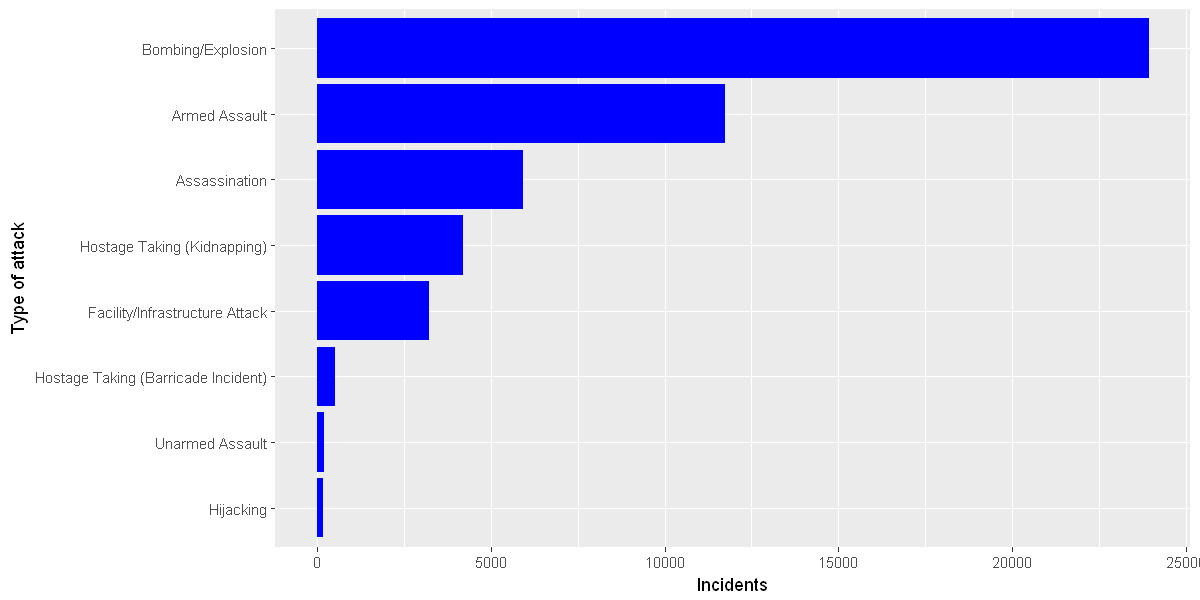

In [11]:
data1 <- data %>% filter(attacktype1_txt != "Unknown") %>%
  group_by(attacktype1_txt) %>%
  summarise(count = n())

ggplot(data1, aes(x = reorder(attacktype1_txt, count), y = count)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Type of attack") +
  ylab("Incidents")

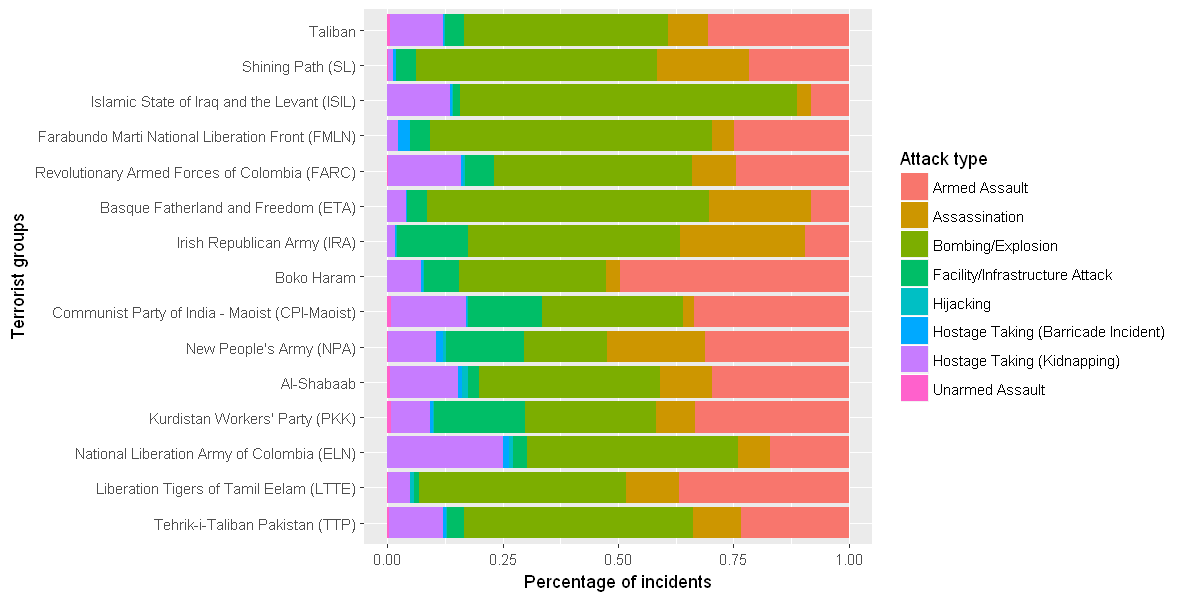

In [12]:
data1 <- data %>% filter(gname %in% best_groups$gname & attacktype1_txt != "Unknown")

ggplot(data1, aes(x = factor(gname, levels = rev(best_groups$gname)), fill = attacktype1_txt)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Attack type") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")

# 5. Which kind of weapons do they use? --- (does the type of weapon depends on the group and/or on the type of attack?)

In [13]:
levels(data$weaptype1_txt)[levels(data$weaptype1_txt)=="Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"] <- "Vehicle"

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

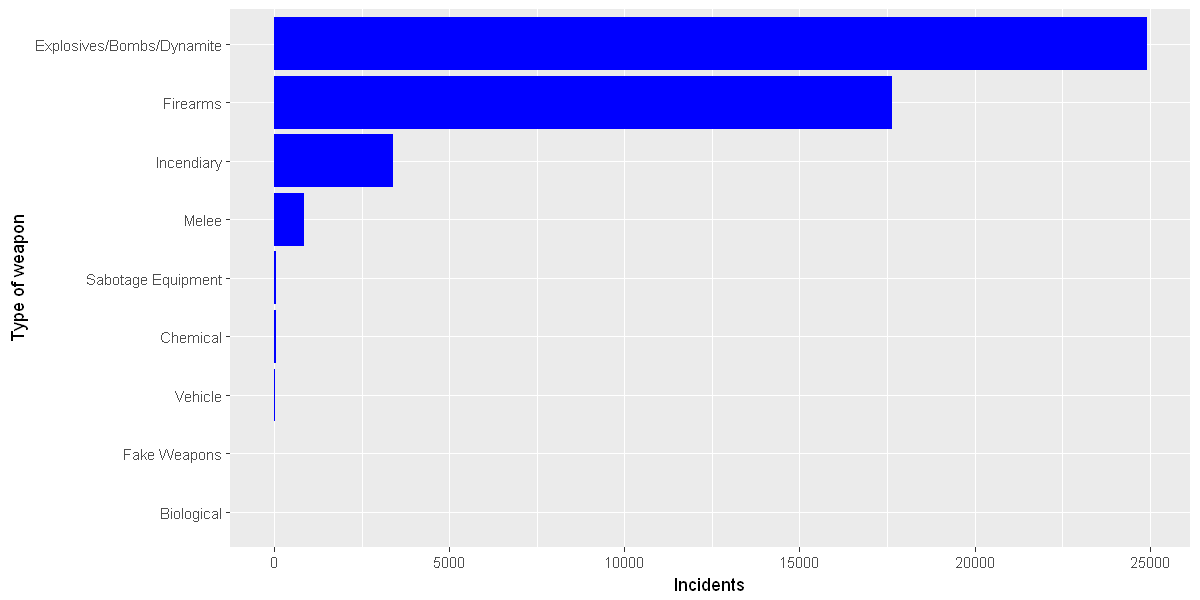

In [14]:
data1 <- data %>% filter(!weaptype1_txt %in% c("Unknown", "Other")) %>%
  group_by(weaptype1_txt) %>% summarise(count = n()) %>% arrange(desc(count))

ggplot(data1, aes(x = reorder(weaptype1_txt, count), y = count)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Type of weapon") +
  ylab("Incidents")

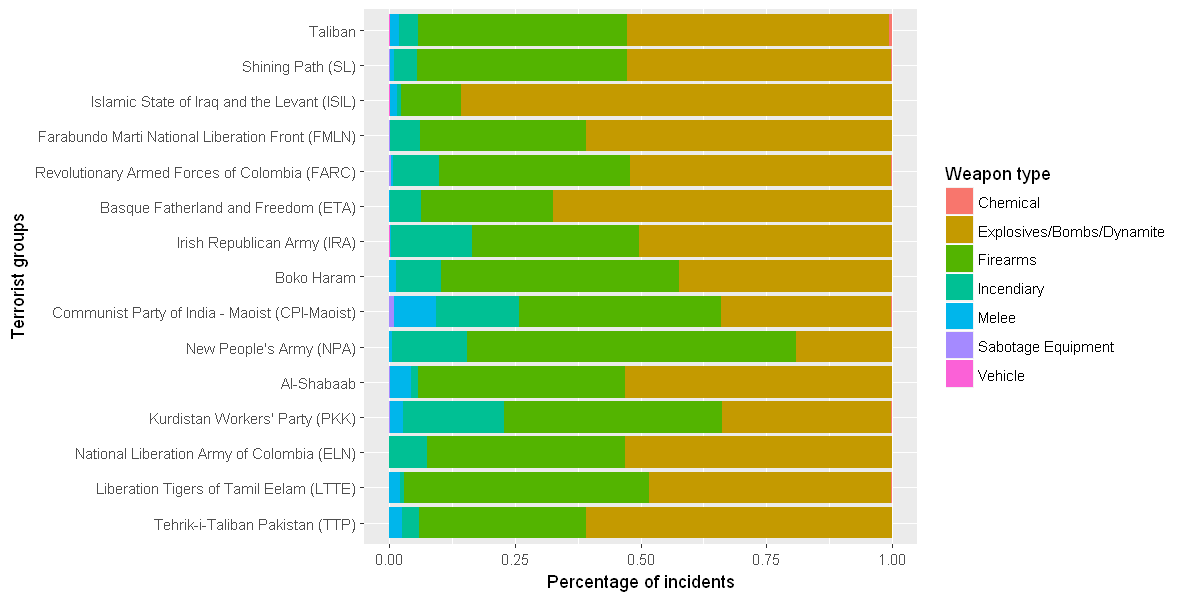

In [15]:
data1 <- data %>% filter(gname %in% best_groups$gname & !weaptype1_txt %in% c("Unknown", "Other"))

ggplot(data1, aes(x = factor(gname, levels = rev(best_groups$gname)), fill = weaptype1_txt)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Weapon type") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")

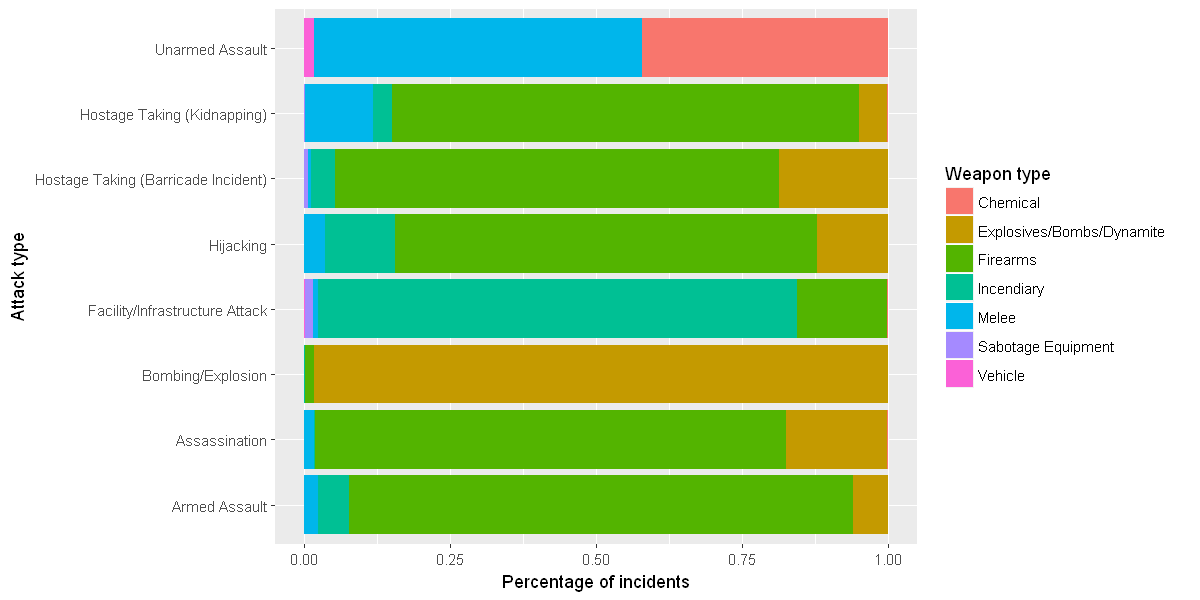

In [16]:
data1 <- data %>% filter(gname %in% best_groups$gname & !weaptype1_txt %in% c("Unknown", "Other") & attacktype1_txt != "Unknown")

ggplot(data1, aes(x = attacktype1_txt, fill = weaptype1_txt)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Weapon type") +
  coord_flip() +
  xlab("Attack type") +
  ylab("Percentage of incidents")

# 6. Do they commit suicide? --- (does commiting suicide depends on the type of attack or/and group or/and motivation?)

# A tibble: 2 × 2
  suicide count
   <fctr> <int>
1      No 49949
2     Yes  2080


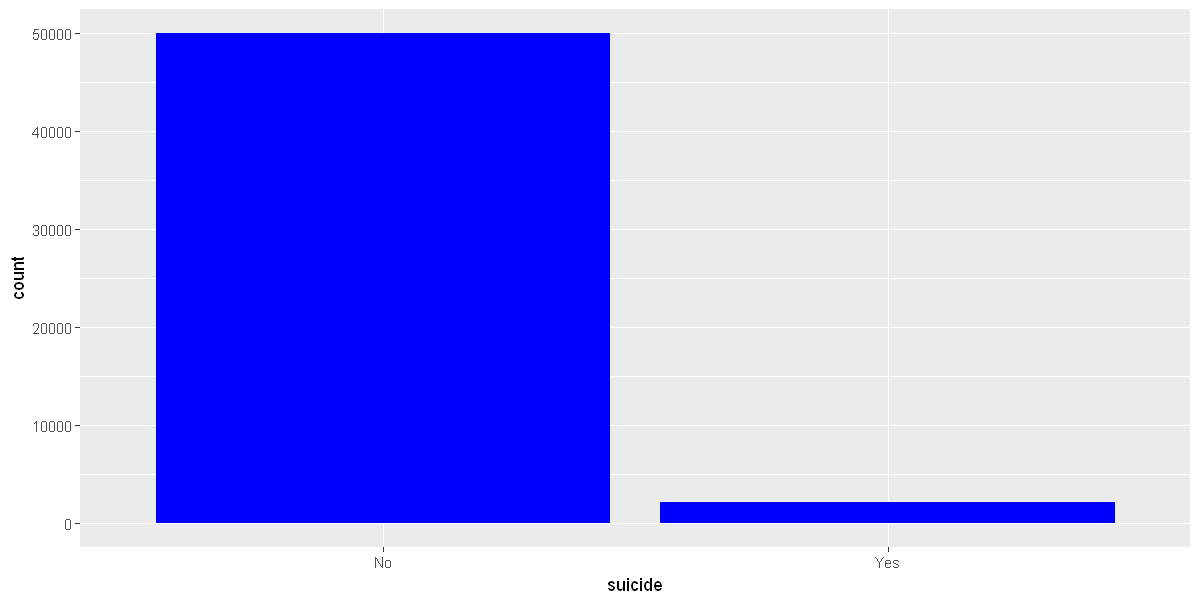

In [17]:
data$suicide <- factor(data$suicide, labels = c("No", "Yes"))

data1 <- data %>% group_by(suicide) %>%
    summarise(count = n()) %>% arrange(desc(count))

print(data1)

ggplot(data1, aes(suicide, count)) +
    geom_bar(stat="identity", fill="blue")

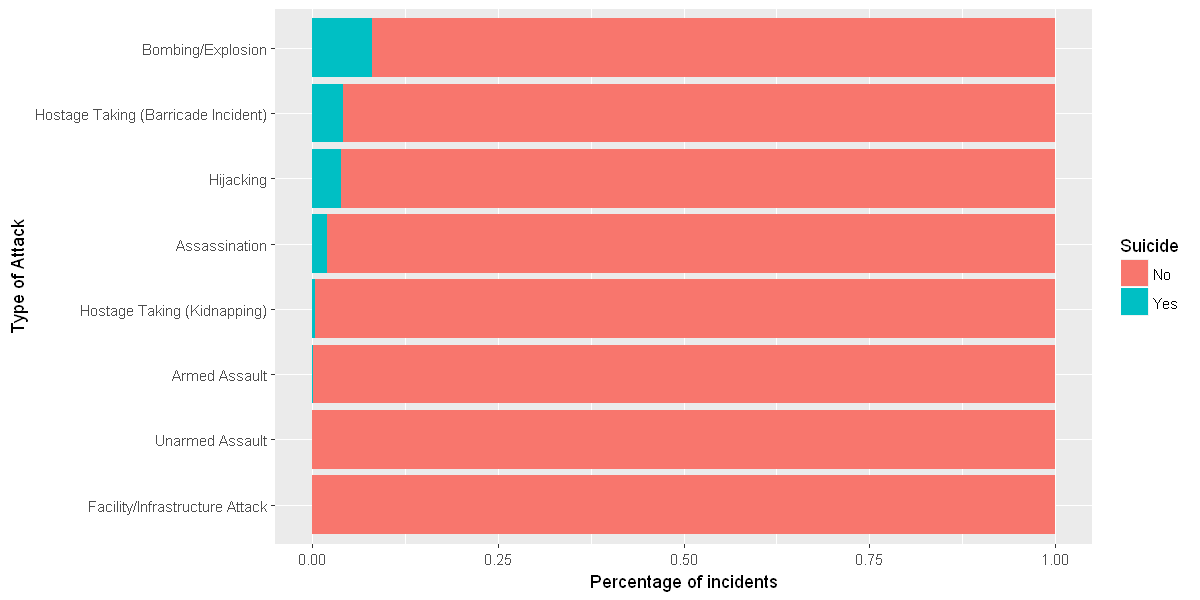

In [18]:
data1 <- data %>% filter(attacktype1_txt != "Unknown") %>% group_by(attacktype1_txt) %>%
  mutate(Yes = table(suicide)[["Yes"]], No = table(suicide)[["No"]], Yes_attacks = Yes/(Yes + No))

ggplot(data1, aes(x = reorder(attacktype1_txt, Yes_attacks), fill = suicide)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Suicide") +
  coord_flip() +
  xlab("Type of Attack") +
  ylab("Percentage of incidents")

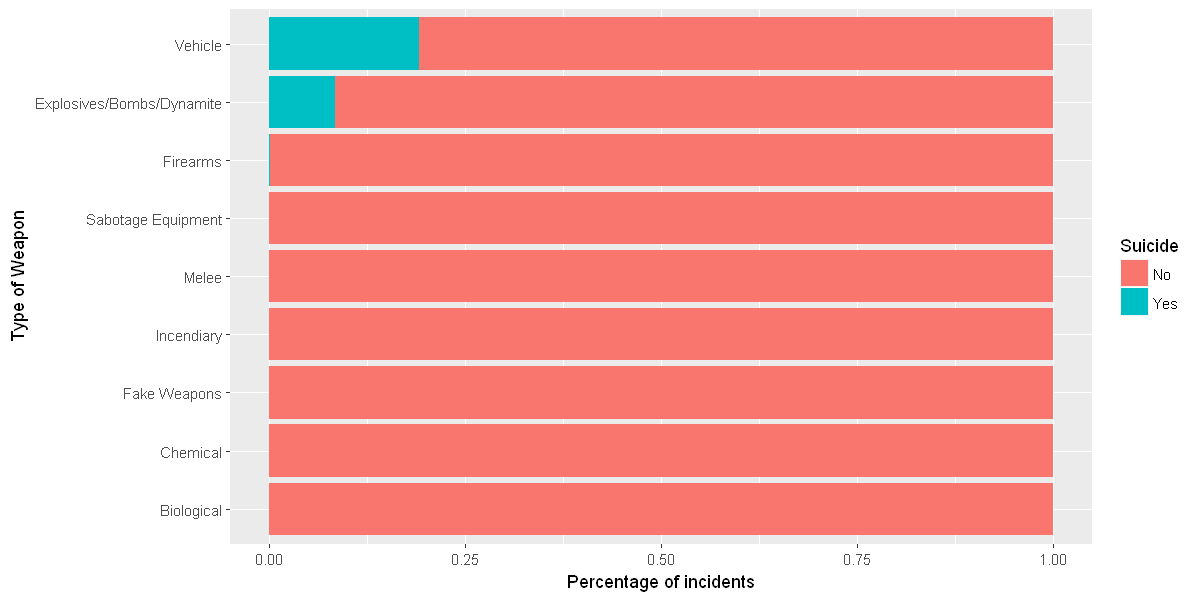

In [19]:
data1 <- data %>% filter(!weaptype1_txt %in% c("Unknown", "Other")) %>%
  group_by(weaptype1_txt) %>% mutate(Yes = table(suicide)[["Yes"]], No = table(suicide)[["No"]], Yes_attacks = Yes/(Yes + No))

ggplot(data1, aes(x = reorder(weaptype1_txt, Yes_attacks), fill = suicide)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Suicide") +
  coord_flip() +
  xlab("Type of Weapon") +
  ylab("Percentage of incidents")

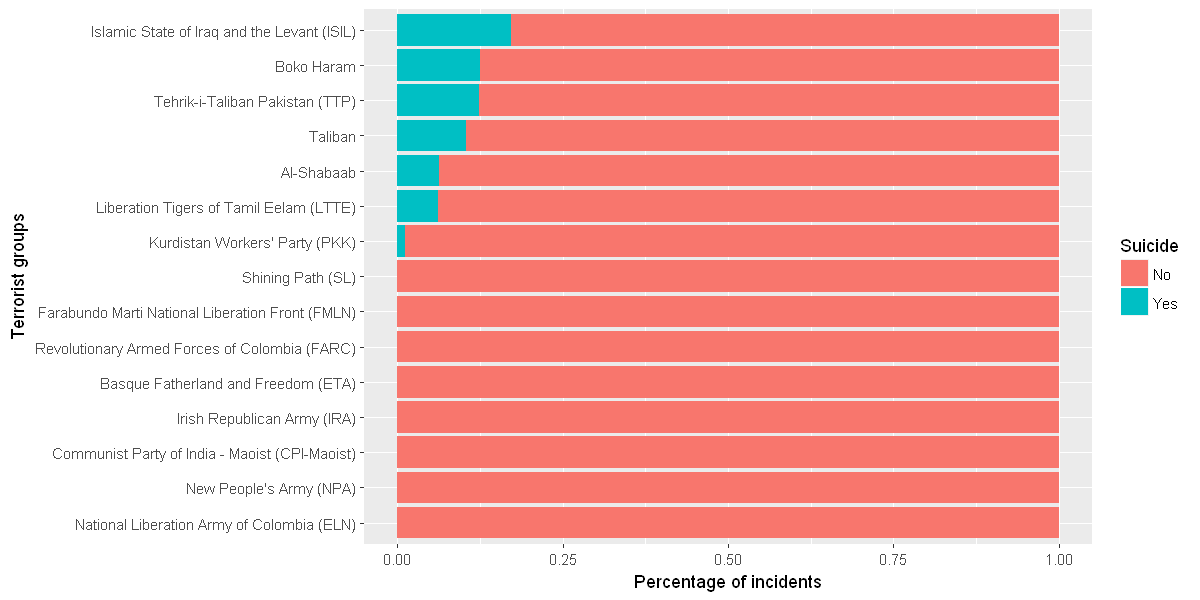

In [20]:
data1 <- data %>% filter(gname %in% best_groups$gname) %>%
  group_by(gname) %>% mutate(Yes = table(suicide)[["Yes"]], No = table(suicide)[["No"]], Yes_attacks = Yes/(Yes + No))

ggplot(data1, aes(x = reorder(factor(gname, levels = rev(best_groups$gname)), Yes_attacks), fill = suicide)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Suicide") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")

It's interesting to see which are the terrorist groups that commit more suicides, and that most of their attacks are suicide

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

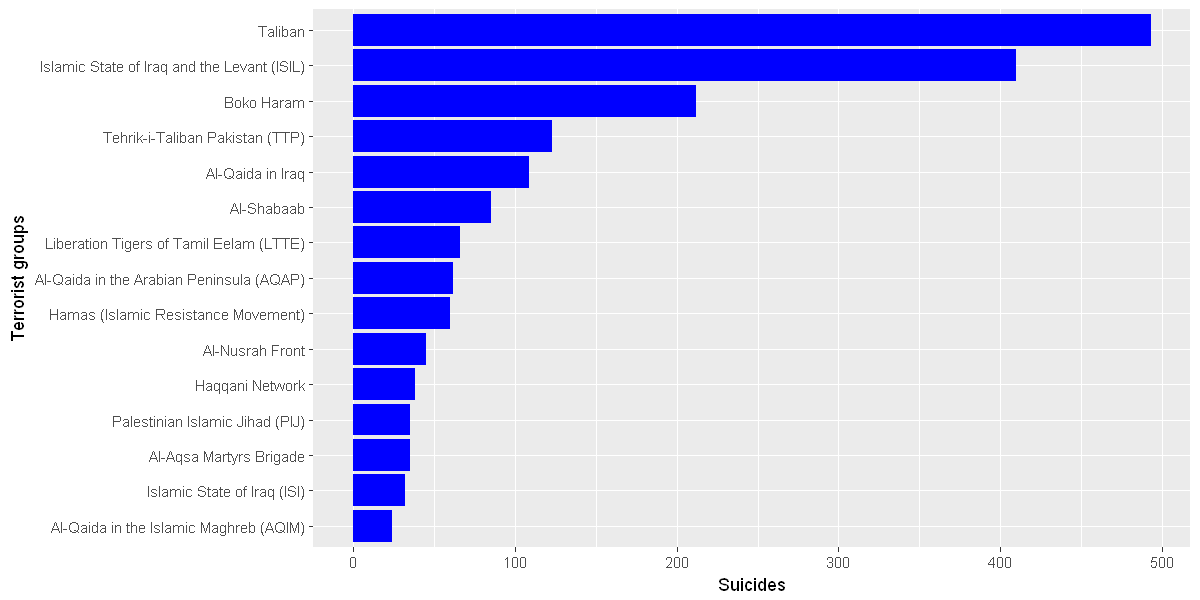

In [21]:
data1 <- data %>% group_by(gname) %>% summarise(Yes = table(suicide)[["Yes"]]) %>%
  arrange(desc(Yes)) %>% head(15) %>% rename(count = Yes)

ggplot(data1, aes(x = reorder(gname, count), y = count)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Terrorist groups") +
  ylab("Suicides")

We only considered groups that had 2 attacks or more!

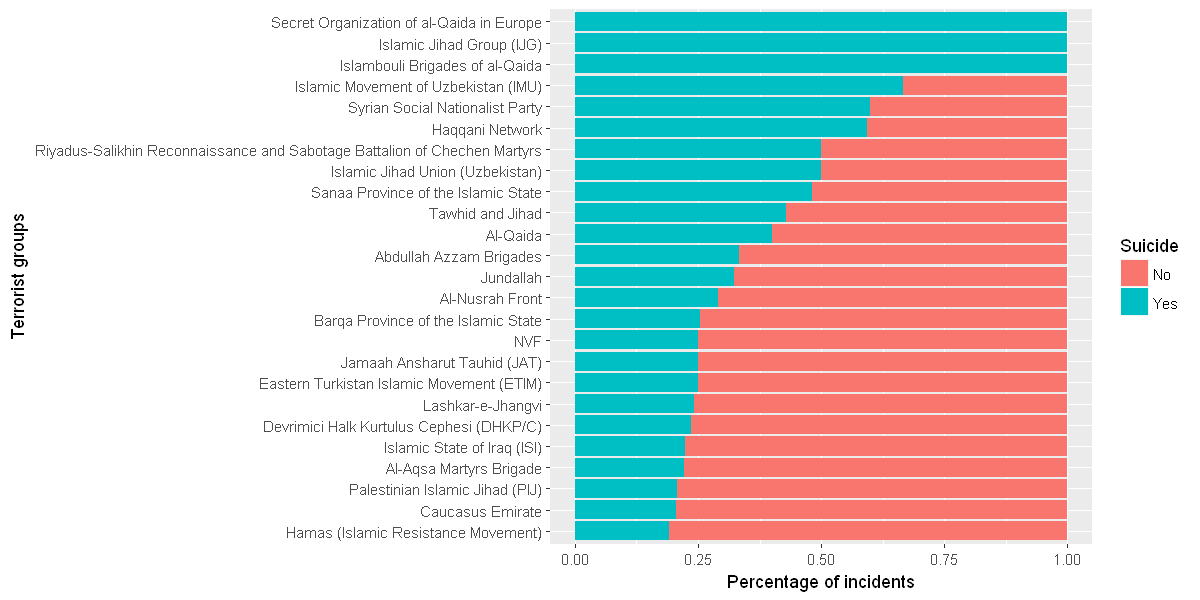

In [22]:
data1 <- data %>% group_by(gname) %>% 
  filter(n() > 1) %>%
  mutate(Yes = table(suicide)[["Yes"]], No = table(suicide)[["No"]], Yes_attacks = Yes/(Yes + No))

best_suicide_groups <- data %>% group_by(gname) %>%
  filter(n() > 1) %>%
  summarise(Yes = table(suicide)[["Yes"]], No = table(suicide)[["No"]], Yes_attacks = Yes/(Yes + No)) %>%
  arrange(desc(Yes_attacks)) %>% .$gname %>% head(25)

data1 <- data1[data1$gname %in% best_suicide_groups, ]

ggplot(data1, aes(x = reorder(gname, Yes_attacks), fill = suicide)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Suicide") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")

# 7. How many terrorists die in an attack? Are they captured? Does this depends on the region?

Number of terrorists killed is not available at the moment

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

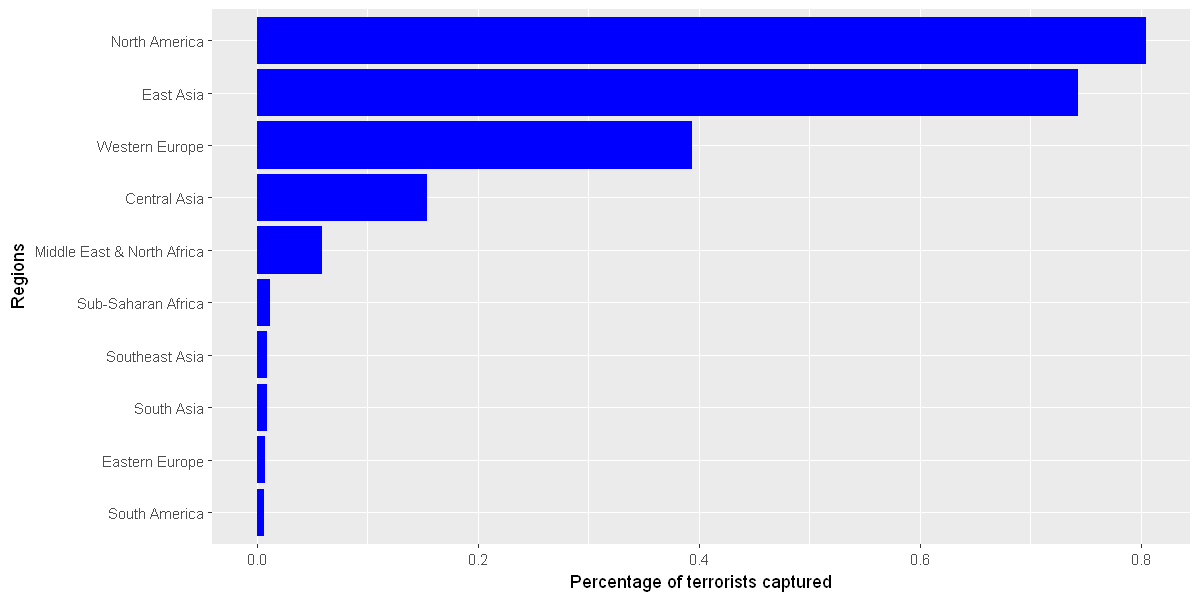

In [23]:
data1 <- data %>% filter(nperps != "Unknown" & nperps != "-99" & nperpcap != "Unknown" & nperpcap != "-99") %>%
  group_by(region_txt) %>%
  summarise(capture_ratio = sum(nperpcap, na.rm = TRUE) / sum(nperps, na.rm = TRUE))

ggplot(data1, aes(x = reorder(region_txt, capture_ratio), y = capture_ratio)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Regions") +
  ylab("Percentage of terrorists captured")

# 8. Are there terrorist groups more successful in theirs attack? --- (attribute Successful Attack)

Make percentages (the most successful groups and shitiest), and the absolute values

In [24]:
data$success <- factor(data$success, labels = c("No", "Yes"))

Think of a way to make this plot better:

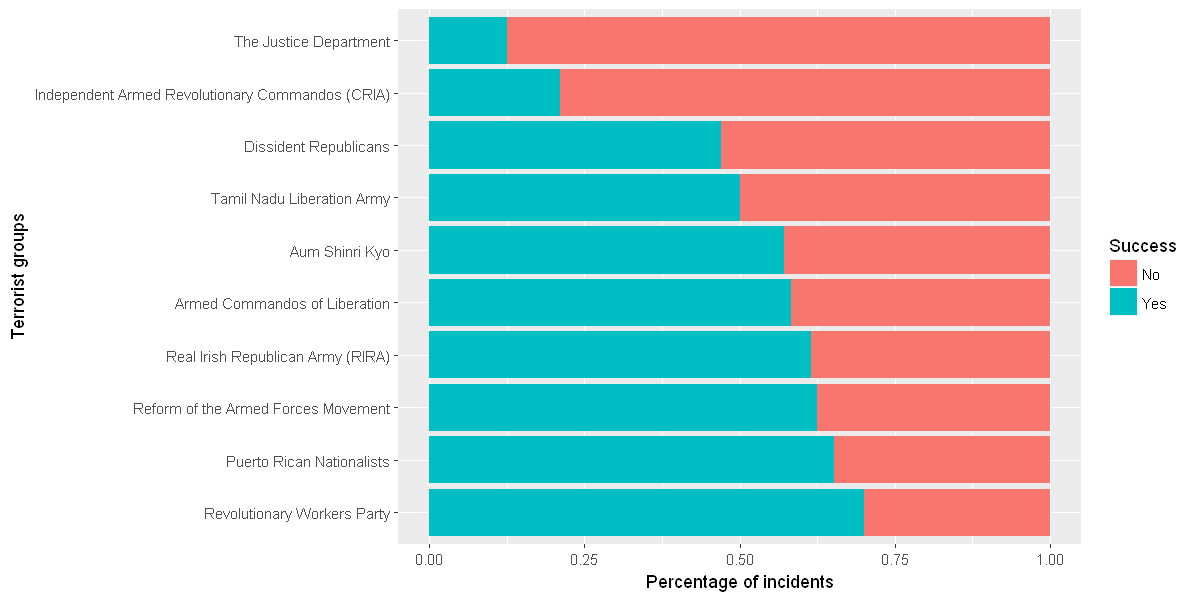

In [25]:
data1 <- data %>% group_by(gname) %>% 
  filter(n() > 4) %>%
  mutate(Yes = table(success)[["Yes"]], No = table(success)[["No"]], Yes_success = Yes/(Yes + No))

best_success_groups <- data %>% group_by(gname) %>%
  filter(n() > 4) %>%
  summarise(Yes = table(success)[["Yes"]], No = table(success)[["No"]], Yes_success = Yes/(Yes + No)) %>%
  arrange(Yes_success) %>% .$gname %>% head(10)

data1 <- data1[data1$gname %in% best_success_groups, ]

#print((data1 %>% filter(Yes_success > 0.95) %>% nrow) / (data1 %>% nrow))

options(repr.plot.width=10, repr.plot.height=5)
ggplot(data1, aes(x = reorder(gname, -Yes_success), fill = success)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Success") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")